<a href="https://colab.research.google.com/github/randaama/DS4002_Group2_Project3/blob/main/distirbution_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# If your dataset is in your Google Drive and you are using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import pandas as pd
from PIL import Image

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm.auto import tqdm

In [ ]:
# Check for GPU
#device = "cuda" if torch.cuda.is_available() else "cpu"

# Check for GPU in mac
device = "mps" if torch.backends.mps.is_available() else "cpu"

device

'cpu'

In [ ]:
def preprocess_image(img):
    # Resize the image
    img_resized = img.resize((128, 128))  # Resize to 128x128 pixels

    # Convert to RGB (if it's not already in RGB)
    img_rgb = cv2.cvtColor(np.array(img_resized), cv2.COLOR_BGR2RGB)

    # Normalize the image to [0, 1] by dividing by 255.0
    img_normalized = img_rgb / 255.0

    return img_normalized

In [ ]:
def create_image_dataframe(base_dir):
    # List to hold the rows of the dataframe
    data = []

    # Loop over the 'train' and 'test' directories
    for split in ['train', 'test']:
        split_dir = os.path.join(base_dir, split)

        # Check if the split directory exists
        if not os.path.isdir(split_dir):
            print(f"Directory not found: {split_dir}")
            continue

        # Iterate over each impairment type directory within train/test
        for impairment_type in ['Moderate Impairment', 'Very Mild Impairment', 'Mild Impairment','No Impairment']:
            impairment_dir = os.path.join(split_dir, impairment_type)

            for img_name in os.listdir(impairment_dir):
                if img_name.lower().endswith('.jpg'):
                    # Full image path
                    img_path = os.path.join(impairment_dir, img_name)
                    img = cv2.imread(img_path)
                    img = cv2.resize(img,(128,128))
                    b, g, r = cv2.split(img)
                    img = cv2.merge([r,g,b])
                    # Append a new row with the image object
                    data.append([impairment_type, img_name, img_path, img])

# Convert the list of data into a pandas DataFrame
    df = pd.DataFrame(data, columns=['Impairment_Type', 'Image_Name', 'Image_Path', 'Image_Data'])
    return df

# Define your base directory where 'train' and 'test' folders are located
base_dir = '/content/drive/MyDrive/alzheimer detection'

# Generate the dataframe
df = create_image_dataframe(base_dir)

# Display the first few rows
print(df.head())

       Impairment_Type                                         Image_Name  \
0  Moderate Impairment  ModerateImpairment-1756-_jpg.rf.206c98c4b1d0a1...   
1  Moderate Impairment  ModerateImpairment-2500-_jpg.rf.5d5865571db929...   
2  Moderate Impairment  ModerateImpairment-809-_jpg.rf.42d22d7ba796597...   
3  Moderate Impairment  ModerateImpairment-1934-_jpg.rf.3df0246ce3e9fd...   
4  Moderate Impairment  ModerateImpairment-720-_jpg.rf.cf03ed557e3da3c...   

                                          Image_Path  \
0  /content/drive/MyDrive/alzheimer detection/tra...   
1  /content/drive/MyDrive/alzheimer detection/tra...   
2  /content/drive/MyDrive/alzheimer detection/tra...   
3  /content/drive/MyDrive/alzheimer detection/tra...   
4  /content/drive/MyDrive/alzheimer detection/tra...   

                                          Image_Data  
0  [[[6, 6, 6], [14, 14, 14], [18, 18, 18], [4, 4...  
1  [[[8, 8, 8], [7, 7, 7], [5, 5, 5], [2, 2, 2], ...  
2  [[[4, 4, 4], [3, 3, 3], [0, 0, 0

In [ ]:
train, test = train_test_split(df,train_size=0.8,stratify=df['Impairment_Type'])

In [ ]:
train.head()

,Impairment_Type,Image_Name,Image_Path,Image_Data
5308,Mild Impairment,MildImpairment-1937-_jpg.rf.b34fc40dfecb126607...,/content/drive/MyDrive/alzheimer detection/tra...,"[[[4, 4, 4], [4, 4, 4], [2, 2, 2], [2, 2, 2], ..."
6168,Mild Impairment,MildImpairment-812-_jpg.rf.2dfd0d176349e76cbaf...,/content/drive/MyDrive/alzheimer detection/tra...,"[[[2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], ..."
2647,Very Mild Impairment,VeryMildImpairment-2264-_jpg.rf.a4a12d6f0461a9...,/content/drive/MyDrive/alzheimer detection/tra...,"[[[4, 4, 4], [4, 4, 4], [4, 4, 4], [4, 4, 4], ..."
2850,Very Mild Impairment,VeryMildImpairment-1160-_jpg.rf.16ff9d831c7fd6...,/content/drive/MyDrive/alzheimer detection/tra...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2883,Very Mild Impairment,VeryMildImpairment-2190-_jpg.rf.3d93ee985f430f...,/content/drive/MyDrive/alzheimer detection/tra...,"[[[4, 4, 4], [3, 3, 3], [2, 2, 2], [2, 2, 2], ..."


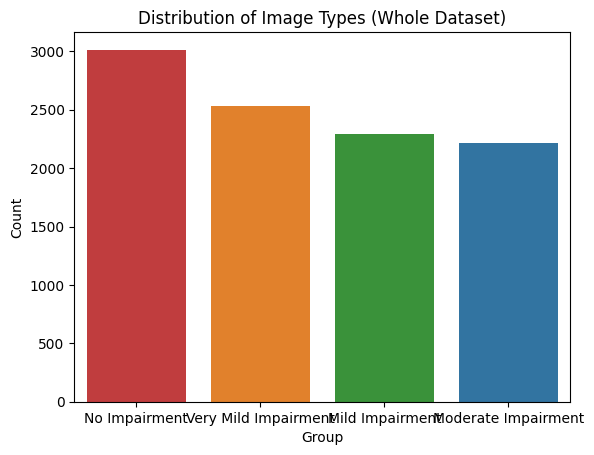

In [ ]:
import seaborn as sns

# We need to plot the distribution of images in the whole, train, and test datasets to ensure
# our subsets are representative of the data as a whole

# Plot distribution of images in the whole dataset
sns.countplot(data=df, x='Impairment_Type',
              order=['No Impairment', 'Very Mild Impairment', 'Mild Impairment', 'Moderate Impairment'],
              hue = "Impairment_Type")
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Distribution of Image Types (Whole Dataset)')
plt.show()

<ipython-input-32-6e7b2d13aa1b>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(['None','Very Mild','Mild','Moderate'])


<Axes: title={'center': 'Distribution of Impairment Image Types (Training Dataset)'}, xlabel="Severity of Alzheimer's", ylabel='Count'>

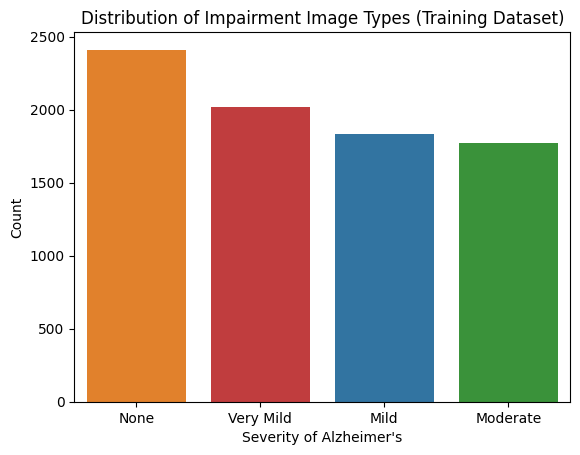

In [ ]:
# Plot distribution of images in the training dataset
plot = sns.countplot(data=train, x='Impairment_Type',
              order=['No Impairment', 'Very Mild Impairment', 'Mild Impairment', 'Moderate Impairment'],
              hue = "Impairment_Type")
plot.set_xlabel('Severity of Alzheimer\'s')
plot.set_ylabel('Count')
plot.set_title('Distribution of Impairment Image Types (Training Dataset)')
plot.set_xticklabels(['None','Very Mild','Mild','Moderate'])
plot

<ipython-input-33-bb95fac84b3b>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(['None','Very Mild','Mild','Moderate'])


<Axes: title={'center': 'Distribution of Impairment Image Types (Testing Dataset)'}, xlabel='Group', ylabel='Count'>

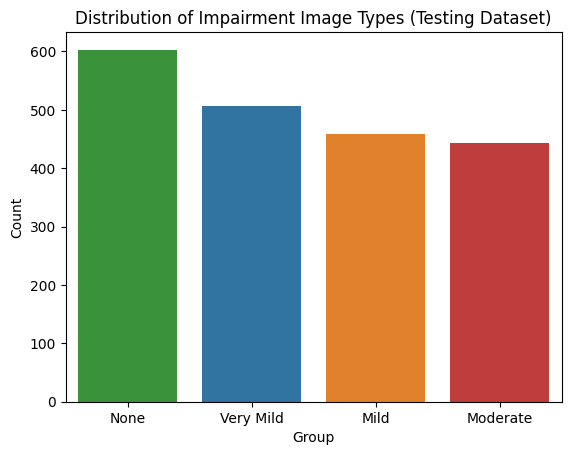

In [ ]:
# Plot distribution of images in the testing dataset
plot = sns.countplot(data=test, x='Impairment_Type',
              order=['No Impairment', 'Very Mild Impairment', 'Mild Impairment', 'Moderate Impairment'],
              hue = "Impairment_Type")
plot.set_xlabel('Group')
plot.set_ylabel('Count')
plot.set_title('Distribution of Impairment Image Types (Testing Dataset)')
plot.set_xticklabels(['None','Very Mild','Mild','Moderate'])
plot